In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
import numpy
import sys
import tensorflow as tf

In [0]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 11s 1us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
import matplotlib.pyplot as plt

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


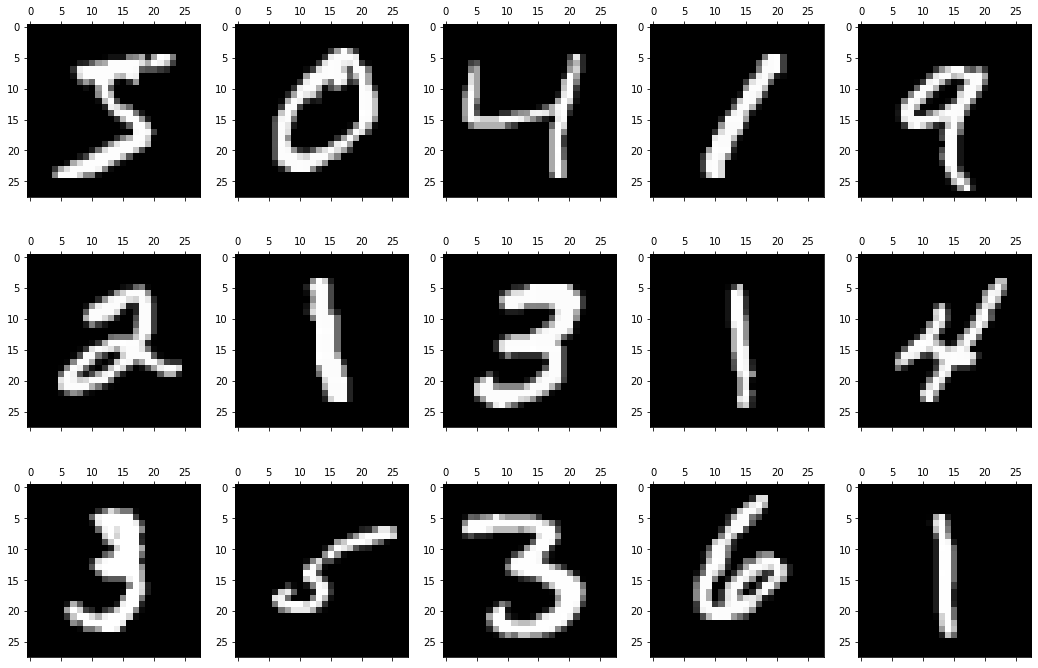

In [8]:
figure,axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18,12)

plt.gray()
print("label={}".format(y_train[0:15]))

col = 0
for row in range(0,3):
    col = row * 5
    axes[row][0].matshow(X_train[col])
    axes[row][1].matshow(X_train[col+1])
    axes[row][2].matshow(X_train[col+2])
    axes[row][3].matshow(X_train[col+3])
    axes[row][4].matshow(X_train[col+4])

In [0]:
X_train = X_train.reshape(X_train.shape[0],784)   # 60000, 28, 28 -> 60000, 784로 변경
# 데이터 값의 범위 0~255 -> 0~1 
X_train.astype('float64')  
X_train = X_train/255

In [0]:
import numpy as np

In [0]:
# 테스트 데이터 전처리
X_test = X_test.reshape(X_test.shape[0],784)
X_test.astype('float64')
X_test = X_test/255

In [0]:
# OneHotEncoding - 10진수의 값을 0, 1의 값을 갖는 벡터로 표현
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

**모델 생성**
* input_dim = 784
* 첫번째 은닉층 512개의 노드, 활성화함수는 relu
* 두번째 은닉층 120개의 노드, 활성화함수는 relu
* 세번재 은닉층 10개의 노드, 활성화함수는 softmax

In [14]:
m = Sequential()
m.add(Dense(512, input_dim=784, activation='relu'))
m.add(Dense(120, activation='relu'))
m.add(Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history = m.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                epochs=30,
                batch_size=200,
                verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.2738 - accuracy: 0.9220 - val_loss: 0.1316 - val_accuracy: 0.9617
Epoch 2/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.0983 - accuracy: 0.9705 - val_loss: 0.0912 - val_accuracy: 0.9713
Epoch 3/30
60000/60000 [==============================] - 6s 100us/step - loss: 0.0641 - accuracy: 0.9805 - val_loss: 0.0795 - val_accuracy: 0.9756
Epoch 4/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 0.0902 - val_accuracy: 0.9718
Epoch 5/30
60000/60000 [==============================] - 6s 95us/step - loss: 0.0314 - accuracy: 0.9907 - val_loss: 0.0736 - val_accuracy: 0.9781
Epoch 6/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.0243 - accuracy: 0.9929 - val_loss: 0.0743 - val_accuracy: 0.9783
Epoch 7/30
60000/60000 [==============================] - 6s 93us

**예측**

In [16]:
pred = m.predict(X_test)
pred.shape

(10000, 10)

In [17]:
pred[0]

array([0.10977218, 0.08261932, 0.10562111, 0.08080696, 0.09061593,
       0.09047072, 0.12147234, 0.1097765 , 0.11366057, 0.09518434],
      dtype=float32)

In [18]:
np.argmax(pred[0])   # argmax : 가장 큰 값의 위치를 알려줌
# 6번째 값이 제일 크므로 6을 예측

6

모델의 평가결과
* 첫번째는 cost
* 두번째는 정확도

In [19]:
m.evaluate(X_test, Y_test)[1]   # 정확도

10000/10000 [==============================] - 1s 78us/step


0.10270000249147415

epoch, batch_size, 은닉층의 수를 조정해가면서 결과 확인해보기
* epoch 수 늘리기
* 배치사이즈는 적게하는 것이 정확도가 올라감
* 은닉층은
* 은닉층의 노드수를 조정해가면서 결과확인

In [20]:
%%time

m = Sequential()
m.add(Dense(512, input_dim=784, activation='relu'))
m.add(Dense(120, activation='relu'))
m.add(Dense(10, activation='softmax'))

m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = m.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                epochs=50,
                batch_size=200,
                verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2737 - accuracy: 0.9213 - val_loss: 0.1325 - val_accuracy: 0.9626
Epoch 2/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.0962 - accuracy: 0.9708 - val_loss: 0.0828 - val_accuracy: 0.9732
Epoch 3/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.0625 - accuracy: 0.9809 - val_loss: 0.0748 - val_accuracy: 0.9775
Epoch 4/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.0427 - accuracy: 0.9867 - val_loss: 0.0683 - val_accuracy: 0.9788
Epoch 5/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0640 - val_accuracy: 0.9793
Epoch 6/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.0221 - accuracy: 0.9937 - val_loss: 0.0626 - val_accuracy: 0.9817
Epoch 7/50
60000/60000 [==============================] - 1s 25us/st

In [21]:
m.evaluate(X_test, Y_test)[1]

10000/10000 [==============================] - 1s 65us/step


0.9861999750137329

In [22]:
%%time

m = Sequential()
m.add(Dense(512, input_dim=784, activation='relu'))
m.add(Dense(120, activation='relu'))
m.add(Dense(10, activation='softmax'))

m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = m.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                epochs=100,
                batch_size=200,
                verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 27us/step - loss: 0.2644 - accuracy: 0.9251 - val_loss: 0.1228 - val_accuracy: 0.9624
Epoch 2/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.0956 - accuracy: 0.9714 - val_loss: 0.0823 - val_accuracy: 0.9742
Epoch 3/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.0614 - accuracy: 0.9818 - val_loss: 0.0773 - val_accuracy: 0.9757
Epoch 4/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.0678 - val_accuracy: 0.9792
Epoch 5/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.0697 - val_accuracy: 0.9794
Epoch 6/100
60000/60000 [==============================] - 1s 24us/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.0662 - val_accuracy: 0.9801
Epoch 7/100
60000/60000 [==============================] - 1s 

In [23]:
m.evaluate(X_test, Y_test)[1]

10000/10000 [==============================] - 1s 65us/step


0.9850000143051147

In [24]:
%%time

m = Sequential()
m.add(Dense(512, input_dim=784, activation='relu'))
m.add(Dense(120, activation='relu'))
m.add(Dense(10, activation='softmax'))

m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = m.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                epochs=50,
                batch_size=100,
                verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 49us/step - loss: 0.2218 - accuracy: 0.9354 - val_loss: 0.1055 - val_accuracy: 0.9677
Epoch 2/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0831 - accuracy: 0.9748 - val_loss: 0.0792 - val_accuracy: 0.9741
Epoch 3/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0666 - val_accuracy: 0.9796
Epoch 4/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.0368 - accuracy: 0.9884 - val_loss: 0.0750 - val_accuracy: 0.9772
Epoch 5/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0301 - accuracy: 0.9901 - val_loss: 0.0678 - val_accuracy: 0.9789
Epoch 6/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0738 - val_accuracy: 0.9795
Epoch 7/50
60000/60000 [==============================] - 3s 47us/st

In [25]:
m.evaluate(X_test, Y_test)[1]

10000/10000 [==============================] - 1s 65us/step


0.9839000105857849

In [26]:
%%time

m = Sequential()
m.add(Dense(512, input_dim=784, activation='relu'))
m.add(Dense(120, activation='relu'))
m.add(Dense(10, activation='softmax'))

m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = m.fit(X_train, Y_train, validation_data=(X_test, Y_test),
                epochs=50,
                batch_size=50,
                verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.2019 - accuracy: 0.9395 - val_loss: 0.1003 - val_accuracy: 0.9705
Epoch 2/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.0780 - accuracy: 0.9760 - val_loss: 0.0801 - val_accuracy: 0.9752
Epoch 3/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0641 - val_accuracy: 0.9815
Epoch 4/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.0378 - accuracy: 0.9879 - val_loss: 0.0771 - val_accuracy: 0.9755
Epoch 5/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.0304 - accuracy: 0.9900 - val_loss: 0.0889 - val_accuracy: 0.9751
Epoch 6/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.0782 - val_accuracy: 0.9797
Epoch 7/50
60000/60000 [==============================] - 5s 86us/st

In [27]:
m.evaluate(X_test, Y_test)[1]

10000/10000 [==============================] - 1s 63us/step


0.9804999828338623